In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the metrics we'll be using
from sklearn import metrics

## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # module to split our data into train and test sets

import statsmodels.api as sm
import statsmodels.tools 

In [2]:
# import the dataset
churn = pd.read_csv('customer_churn.csv')

### Step 1 - EDA!
### Step 2 - Check for nulls
### Step 3 - Data Cleaning!
### (Step # - Train test Split )
### Step 4 - Feature Engineering ^_^
### Step 5 - Create the Model & Fit the model & Do the prediction!
### Step 6 - Check Stats / Summary!
### Step 7 - Metrics ! Evaluate how well we are performing!
### Step 7.5 - change the feature engineering and go back to step 4....
### .... if happy with model go to step 8
### Step 8 - Run .predict on the test data! and run metrics!

#### Quick Data Checks


In [3]:
# print head of the dataset
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [4]:
# checking for the dataset columns
churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [5]:
# checking length of the customer id
len(churn.CustomerID)


7043

In [6]:
# checking the data types
churn.dtypes


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [7]:
# checking the shape of the data
churn.shape

(7043, 31)

In [8]:
# to check the various reasons for churning
churn['Churn Reason'].unique()


array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [9]:
# printing the unique
cols = ['Churn Reason','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Backup','Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Tenure Months','Zip Code']
for col in cols:
    print(churn[col].unique())

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'Two year' 'One year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[ 53.85  70.7   99.65 ... 108.35  63.1   78.7 ]
['108.

In [10]:
# select the category columns
category_columns = ['Dependents', 'Phone Service', 'Multiple Lines', 'Gender', 'Churn Reason',
                      'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection','Tech Support', 'Streaming TV', 'Streaming Movies']

In [11]:
# This is dataframe with all the people who have not yet churned
df_churn = churn[churn['Churn Reason'].isnull()].copy()

In [12]:
churn_backup = churn.copy()

In [13]:
churn_backup.shape

(7043, 31)

In [14]:
# shape of the df_churn
df_churn.shape

(5174, 31)

### EDA


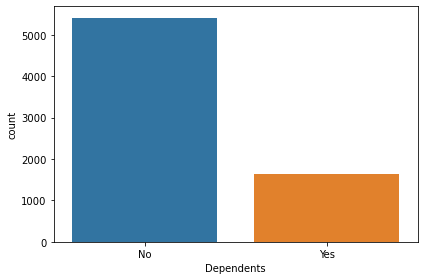

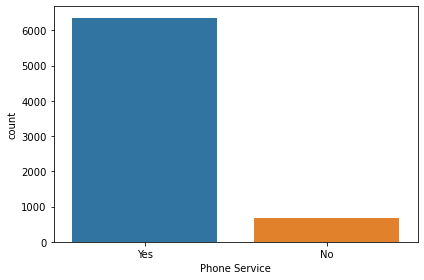

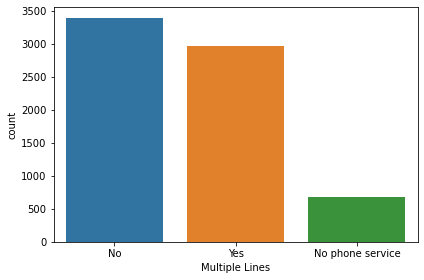

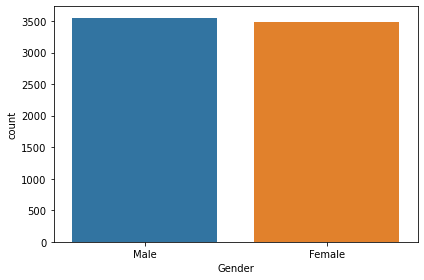

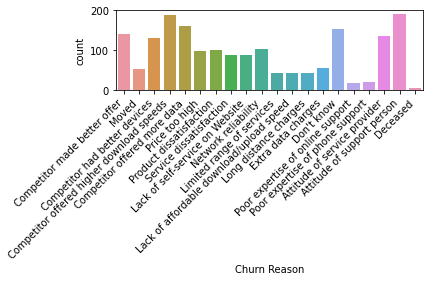

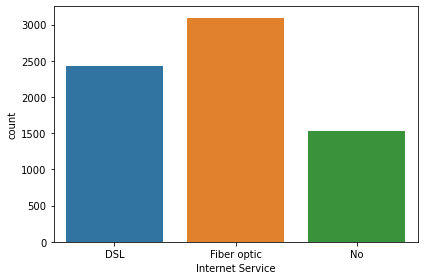

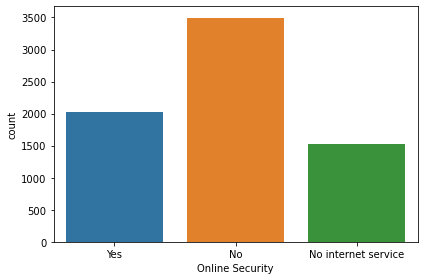

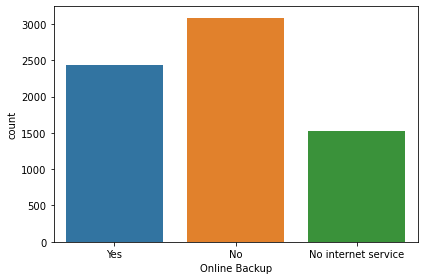

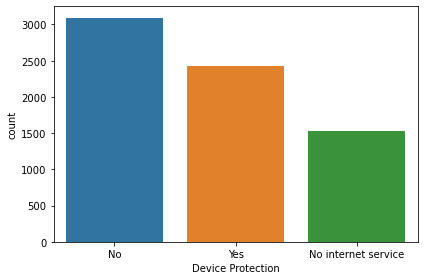

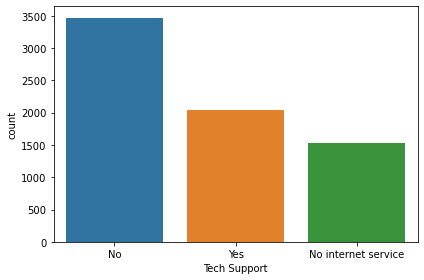

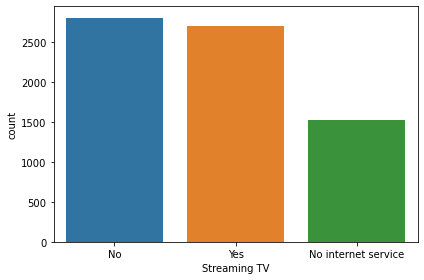

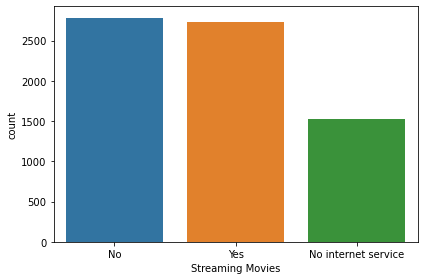

In [15]:
# generate the countplot
for col in category_columns:
    ax = sns.countplot(data=churn, x=col, orient = 'h')
    if col == 'Churn Reason':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [16]:
# Define a new dataframe including only the customers who have churned
churners = churn[churn["Churn Label"] == "Yes"]
churners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [115]:
def get_category_counts(dataframe):
    # Partner column
    No_count_partner = (dataframe['Partner'] == 'No').sum()
    Yes_count_partner = (dataframe['Partner'] == 'Yes').sum()

    # Dependents column
    No_count_dependents = (dataframe['Dependents'] == 'No').sum()
    Yes_count_dependents = (dataframe['Dependents'] == 'Yes').sum()

    # Gender column
    Male_count = (dataframe['Gender'] == 'Male').sum()
    Female_count = (dataframe['Gender'] == 'Female').sum()

    # Senior Citizen column
    No_count_senior = (dataframe['Senior Citizen'] == 'No').sum()
    Yes_count_senior = (dataframe['Senior Citizen'] == 'Yes').sum()

    # Return counts
    return {
        'Partner': {'Yes': Yes_count_partner, 'No': No_count_partner},
        'Dependents': {'Yes': Yes_count_dependents, 'No': No_count_dependents},
        'Gender': {'Male': Male_count, 'Female': Female_count},
        'Senior Citizen': {'Yes': Yes_count_senior, 'No': No_count_senior}
    }

# Example usage
churn_counts = get_category_counts(churn)
print("Counts for churn dataframe:")
print(churn_counts)

churners_counts = get_category_counts(churners)
print("Counts for churners dataframe:")
print(churners_counts)


Counts for churn dataframe:
{'Partner': {'Yes': 3393, 'No': 3639}, 'Dependents': {'Yes': 1620, 'No': 5412}, 'Gender': {'Male': 3549, 'Female': 3483}, 'Senior Citizen': {'Yes': 1142, 'No': 5890}}
Counts for churners dataframe:
{'Partner': {'Yes': 669, 'No': 1200}, 'Dependents': {'Yes': 106, 'No': 1763}, 'Gender': {'Male': 930, 'Female': 939}, 'Senior Citizen': {'Yes': 476, 'No': 1393}}


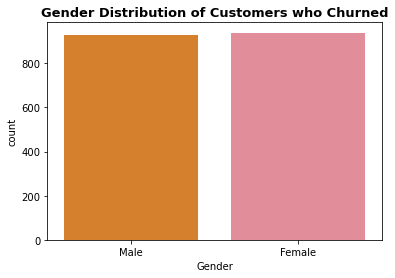

In [18]:
# Gender distribution of churners
sns.set_palette(["#F08010", "#F08090"])

# Plot gender distribution of churners
sns.countplot(x="Gender", data=churners)

# Add title
plt.title("Gender Distribution of Customers who Churned", fontweight="bold", fontsize = 13)

# Show plot
plt.show()

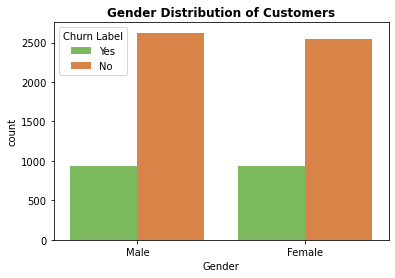

In [19]:
# Gender distribution of customers
sns.set_palette(["#78C850", "#F08030"])

# Plot gender distribution of customers
sns.countplot(x="Gender", hue="Churn Label", data=churn)

# Add title
plt.title("Gender Distribution of Customers", fontweight="bold")

# Show plot
plt.show()

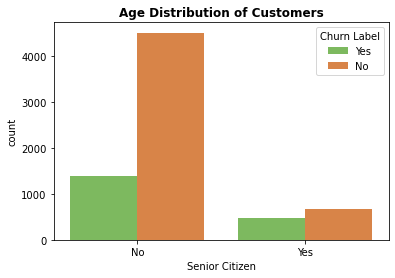

In [20]:
# Gender distribution of customers
sns.set_palette(["#78C850", "#F08030"])

# Plot gender distribution of customers
sns.countplot(x="Senior Citizen", hue="Churn Label", data=churn)

# Add title
plt.title("Age Distribution of Customers", fontweight="bold")

# Show plot
plt.show()

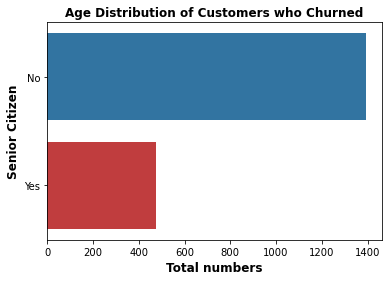

In [21]:

# Age distribution of customers
age_summary = churners["Senior Citizen"].value_counts()

# Create a bar plot with custom colors
sns.barplot(y=age_summary.index, x=age_summary.values, palette=["tab:blue", "tab:red"])

# Add a title and axis labels
plt.title("Age Distribution of Customers who Churned", fontweight="bold")
plt.xlabel("Total numbers", fontsize=12, fontweight="bold")
plt.ylabel("Senior Citizen", fontsize=12, fontweight="bold")

plt.show()


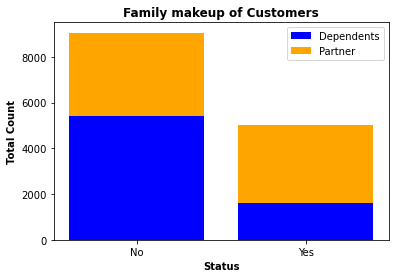

In [22]:
# Family makeup of customers:
dependents_summary = churn["Dependents"].value_counts()
partner_summary = churn["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents_summary.index, dependents_summary.values, label="Dependents", color="blue")
ax.bar(partner_summary.index, partner_summary.values, bottom=dependents_summary.values, label="Partner", color="orange")
ax.set_title("Family makeup of Customers",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")
ax.legend()
plt.show()

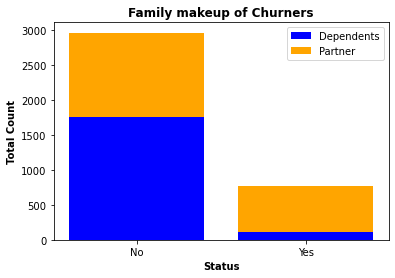

In [23]:
# Family makeup of churners:
dependents_summary = churners["Dependents"].value_counts()
partner_summary = churners["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents_summary.index, dependents_summary.values, label="Dependents", color="blue")
ax.bar(partner_summary.index, partner_summary.values, bottom=dependents_summary.values, label="Partner", color="orange")
ax.set_title("Family makeup of Churners",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")
ax.legend()
plt.show()


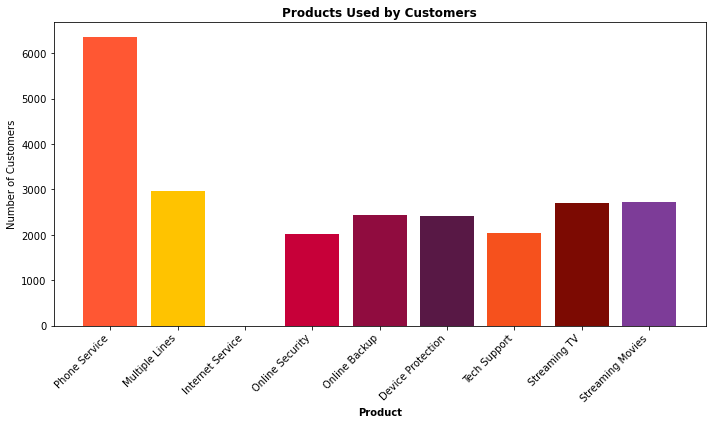

In [24]:
# Products used by the Customers
products = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
product_counts = [churn[churn[product] == 'Yes'].shape[0] for product in products]

plt.figure(figsize=(10, 6))
plt.bar(products, product_counts, color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#F6511D', '#7C0A02', '#7D3C98'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product',fontweight="bold")
plt.ylabel('Number of Customers')
plt.title('Products Used by Customers',fontweight="bold")
plt.tight_layout()
plt.show()


In [25]:
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


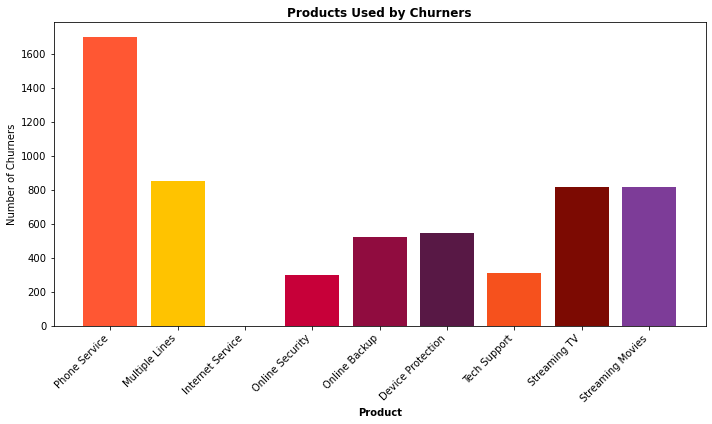

In [26]:
# Products used by the Churners
products = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
product_counts = [churners[churners[product] == 'Yes'].shape[0] for product in products]

plt.figure(figsize=(10, 6))
plt.bar(products, product_counts, color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#F6511D', '#7C0A02', '#7D3C98'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product',fontweight="bold")
plt.ylabel('Number of Churners')
plt.title('Products Used by Churners',fontweight="bold")
plt.tight_layout()
plt.show()


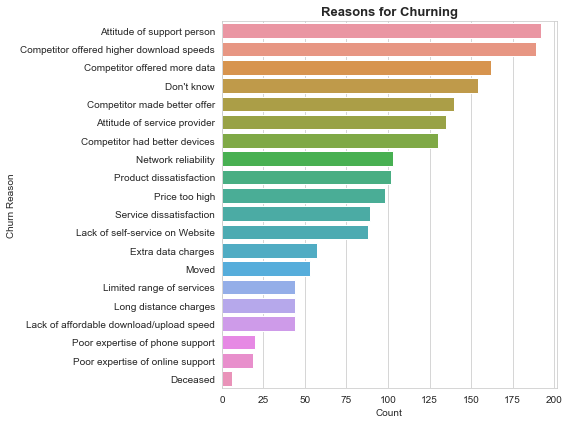

In [27]:
### To find the various churn reasons for customers, we plot one graph
# Churn Reasons

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(y="Churn Reason", data=churners, order=churners["Churn Reason"].value_counts().index, ax=ax)

ax.set_xlabel("Count")
ax.set_ylabel("Churn Reason")
ax.set_title("Reasons for Churning", fontweight="bold", fontsize=13)

plt.tight_layout()
plt.show()


In [28]:
# drop the churn column
churn.drop(columns = [ 'Count'], inplace = True)

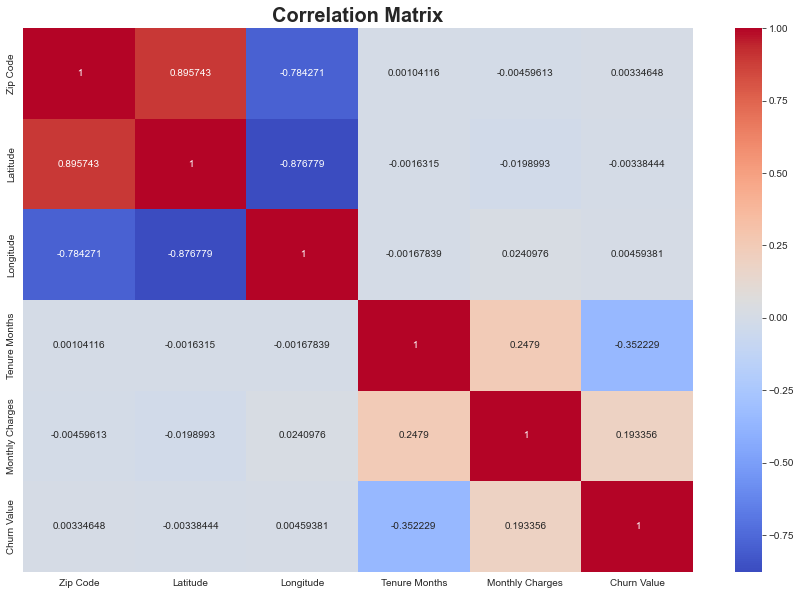

In [29]:
#using correlation matrix
# plotting correlation matrix
corr_mat = churn.corr()
fig = plt.figure(figsize=(15,10))
plt.title("Correlation Matrix", fontsize=20,fontweight="bold")
sns.heatmap(corr_mat,annot=True,cmap = 'coolwarm' ,fmt="2g")
plt.show()


### Data Cleaning

In [30]:
# converting to numeric values
churn['Total Charges'] = pd.to_numeric(churn['Total Charges'], errors='coerce')


In [31]:
# To fill the null values for customers who did not churn yet
churn['Churn Reason'] = churn['Churn Reason'].fillna('Not Churned')


In [32]:
# checking for the missing values
churn.isnull().sum()

CustomerID            0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64

In [33]:
# drop the total charges column
churn.dropna(axis = 0, subset = ['Total Charges'], inplace=True)

In [34]:
#to Find the churn rate based on city
churn_counts = churn.groupby("City")["Churn Value"].sum()

customer_counts = churn.groupby("City")["CustomerID"].nunique()

churn_rate = churn_counts / customer_counts


def categorise_city(churn_rate):
    if churn_rate >= 0.5:
        return "High Churning City"
    else:
        return "Low Churning City"


churn["churn_category"] = churn["City"].map(churn_rate.apply(categorise_city))

churn.head(200)

,CustomerID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,churn_category
0,3668-QPYBK,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer,Low Churning City
1,9237-HQITU,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved,Low Churning City
2,9305-CDSKC,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved,Low Churning City
3,7892-POOKP,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved,Low Churning City
4,0280-XJGEX,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices,Low Churning City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0691-IFBQW,United States,California,Biola,93606,"36.798882, -120.019511",36.798882,-120.019511,Female,Yes,...,Yes,One year,Yes,Electronic check,110.00,4874.80,Yes,1,Competitor made better offer,High Churning City
196,3009-JWMPU,United States,California,Five Points,93624,"36.397745, -120.119911",36.397745,-120.119911,Male,No,...,Yes,One year,Yes,Electronic check,96.75,6125.40,Yes,1,Attitude of service provider,High Churning City
197,1450-GALXR,United States,California,Friant,93626,"37.027663, -119.69056",37.027663,-119.690560,Female,No,...,Yes,Month-to-month,Yes,Electronic check,98.50,1058.25,Yes,1,Attitude of service provider,Low Churning City
198,3138-BKYAV,United States,California,Kerman,93630,"36.727418, -120.123526",36.727418,-120.123526,Male,No,...,No,Month-to-month,Yes,Electronic check,85.35,489.45,Yes,1,Attitude of service provider,Low Churning City


In [35]:
# printing the churn columns
churn.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Reason',
       'churn_category'],
      dtype='object')

In [36]:
## Counting the number in each churn category
# Count the number of low churning and high churning cities
counts = churn["churn_category"].value_counts()

# Print the counts
print(counts)


Low Churning City     5909
High Churning City    1123
Name: churn_category, dtype: int64


In [37]:
# drop the customer id,country, state, churn label
churn.drop(columns = ['CustomerID', 'Country', 'State', 'Churn Label'], inplace = True)

In [38]:
# checking for the missing values
churn.isnull().sum()


City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
Churn Reason         0
churn_category       0
dtype: int64

### Test Train Split

In [39]:
# checking for the churn columns
churn.columns

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason', 'churn_category'],
      dtype='object')

In [40]:
# First we make a list of our base feature_cols.
# This is everything but we're removing price - since that's our target!

feature_cols = list(churn.columns)
feature_cols.remove('Churn Value')

In [41]:
# remove the city, latitude, longitude, zip code, lat long and churn reason for the purpose of feature engineering
to_remove = ['City','Latitude', 'Longitude','Zip Code','Lat Long', 'Churn Reason']
for col in to_remove:
  feature_cols.remove(col)

In [42]:
# Create X and y. For train test split

X = churn[feature_cols]
y = churn['Churn Value']

In [43]:
# print the X head
X.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,churn_category
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low Churning City
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low Churning City
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Low Churning City
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Low Churning City
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Low Churning City


In [44]:
## The train_test_split function returns 4 items.
## We have to specify 4 names in their specific order to receive each item:
## 1. X train set, 2. X test set, 3. y train set, 4. y test set

## The 'train_test_split()' function takes the following arguments: dataframe of X, dataframe of y, 'test_size' this
## parameter is a decimal value that specifies the proportion of the test data (e.g. 0.25 results in a quarter of the
## data being used as test), 'random_state' with this parameter you can set a random seed so your split can be
## replicated.
## The function takes many more argument which you can find in the documentation:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Let's see an example of train test split!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 55) # for Statsmodel


In [45]:
# print the y_train tail
y_train.tail()

6694    0
968     1
4397    0
4769    0
4563    0
Name: Churn Value, dtype: int64

####  Feature Engineering
##### Changing to Numerical values for object type


In [46]:
## We'll do the cleaning properly all in 1 go, since we now know what to do
def feature_engineering(df):
   my_dict = {'Senior Citizen': {'Yes': 1, 'No': 0},'Partner': {'Yes':1, 'No':0},'Dependents': {'Yes': 1, 'No':0}, 'Phone Service' : {'Yes': 1, 'No':0},'Paperless Billing' : {'Yes': 1, 'No':0}, 'Gender': {'Male':1, 'Female':0}, 'churn_category':{'High Churning City': 1, 'Low Churning City': 0 }
              }
   
   for col, col_map in my_dict.items():
     df[col] = df[col].map(col_map)

   my_columns = {'Payment Method':'Pay','Multiple Lines': 'ML', 'Internet Service': 'IS', 'Online Security' : 'OS', 'Online Backup': 'OB', 'Device Protection': 'DP', 'Tech Support': 'TS', 'Streaming TV' : 'ST', 'Streaming Movies' : 'SM', 'Contract' : 'Con'}#OHE
   
   for location,pref in my_columns.items():
     df = pd.get_dummies(data = df, columns=[location], prefix=pref, drop_first=True)

   return df
   

In [47]:
# print the X_train head
X_train.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,churn_category
5522,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,Low Churning City
3282,Female,No,No,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,95.50,6153.85,High Churning City
1432,Female,Yes,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,69.55,Low Churning City
6016,Male,No,Yes,Yes,64,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15,Low Churning City
330,Female,No,No,No,2,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,30.90,59.05,High Churning City


In [48]:
##   Feature Engineering is applied to training data
X_train_f = feature_engineering(X_train)

In [49]:
# converting the X_train feature to csv
X_train_f.to_csv('X_train_f.csv')

### Model 1 - Base Model


In [50]:
#building the model using statsmodel
X_train_f = sm.add_constant(X_train_f, has_constant='skip')

In [51]:
X_train_f

,const,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,...,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,ST_No internet service,ST_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year
5522,1.0,1,0,1,1,20,1,0,20.05,400.00,...,1,0,1,0,1,0,1,0,0,1
3282,1.0,0,0,0,0,65,1,1,95.50,6153.85,...,0,1,0,0,0,1,0,0,1,0
1432,1.0,0,1,1,0,1,1,1,69.55,69.55,...,0,0,0,0,0,0,0,0,0,0
6016,1.0,1,0,1,1,64,1,0,90.25,5629.15,...,0,1,0,0,0,0,0,1,1,0
330,1.0,0,0,0,0,2,0,1,30.90,59.05,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,1.0,1,0,1,1,70,1,1,116.55,8152.30,...,0,1,0,1,0,1,0,1,0,1
968,1.0,0,0,0,0,24,0,1,54.15,1240.25,...,0,1,0,0,0,1,0,1,0,0
4397,1.0,0,0,1,1,28,1,1,70.40,1992.20,...,0,0,0,0,0,0,0,0,1,0
4769,1.0,0,0,0,0,2,1,0,50.95,123.05,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif["features"] = X_train_f.columns

# Remove variables with high VIF scores
X_train_f = X_train_f.drop(columns=vif[vif["VIF Factor"] > 10].features)

C:\Users\vigne\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vigne\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [53]:
# define the model
log_reg = sm.Logit(y_train, X_train_f).fit()


Optimization terminated successfully.
         Current function value: 0.388794
         Iterations 8


In [54]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5256
Method:                           MLE   Df Model:                           17
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3215
Time:                        00:00:42   Log-Likelihood:                -2050.5
converged:                       True   LL-Null:                       -3022.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7048      0.133     -5.282      0.000      -0.966      -0.443
Gender                         -0.0399      0.078     -0.512      0.609      -0.193       0.113
Senior Citizen                  0.2453      0.102      2.410      0.016       0.046       0.445
Partner                         0.1757      0.091      1.937      0.053      -0.002       0.354
Dependents                     -1.5069      0.136    -11.088      0.000      -1.773      -1.241
Tenure Months                  -0.0318      0.003    -11.180      0.000      -0.037      -0.026
Paperless Billing               0.5863      0.087      6.735      0.000       0.416       0.757
churn_category                  1.6177      0.100     16.193      0.000       1.422       1.814
Pay_Credit card (automatic)    -0.1982      0.138     -1.440      0.150      -0.468       0.072
Pay_Electronic check            0.4346      0.112      3.872      0.000       0.215       0.655
Pay_Mailed check               -0.3288      0.132     -2.486      0.013      -0.588      -0.070
ML_Yes                          0.5958      0.089      6.674      0.000       0.421       0.771
OS_Yes                         -0.3231      0.101     -3.184      0.001      -0.522      -0.124
OB_Yes                          0.1125      0.093      1.205      0.228      -0.070       0.295
DP_Yes                          0.2289      0.093      2.467      0.014       0.047       0.411
TS_Yes                         -0.1760      0.101     -1.736      0.082      -0.375       0.023
Con_One year                   -0.9307      0.126     -7.363      0.000      -1.178      -0.683
Con_Two year                   -1.7533      0.206     -8.514      0.000      -2.157      -1.350
===============================================================================================
"""

In [55]:
#building the Logistic Regression object
lr = LogisticRegression(max_iter=500, random_state=10)


In [56]:
## So, we have an empty LogisticRegression() object. This needs to be fit on our data first and foremost
## Since we're using sklearn, the rule of thumb is: first parameter = features, second parameter = target
lr.fit(X_train_f, y_train)


LogisticRegression(max_iter=500, random_state=10)

In [57]:
## Here one is the probability of outcome 0 (No Churn), the other the probability of outcome 1 (Churn)
## Since these are the only 2 options, it adds up (quite literally! They add up to 1)

## Let's store them in 2 columns then, called 'prob_no_Churn' and 'prob_Churn'
X_train_f[['prob_no_Churn', 'prob_Churn']] = lr.predict_proba(X_train_f)

In [58]:
## Fantastic! However.. we still need to make a binary prediction: Has this customer got churn?
## This will be based on the probabilities offered. If prob_churn > .5, we can say they will churn.
## Why .5? This is what we call a CUT-OFF POINT - and it's yet another parameter we can pick! We'll try .5, but it might indeed
## not be the optimum value. Maybe we need to use .6, maybe .65: You should explore this on your own
## We'll store our prediction in a column called 'y_pred' and use the np.where() method to do so

cut_off = 0.50
X_train_f['y_pred'] = np.where(X_train_f['prob_Churn']>= cut_off, 1, 0)

Evaluate Performance

In [59]:
## The 'metrics' module from sklearn covers all of them (and more!) So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for the Churning predictions is:")
    print(metrics.confusion_matrix(predicted, actual), "\n")
    print(f'The accuracy of the Churning prediction model is: {metrics.accuracy_score(predicted, actual)}')
    print(f'The recall of the Churning prediction model is: {metrics.recall_score(predicted, actual)}')
    print(f'The precision of the Churning prediction model is: {metrics.precision_score(predicted, actual)}')
    print(f'The F1-score of the Churning prediction model is: {metrics.f1_score(predicted, actual)}')

In [60]:
## Now, we simply apply the function on our predictions
get_results(y_train, X_train_f['y_pred'])

The confusion matrix for the Churning predictions is:
[[3578  643]
 [ 325  728]] 

The accuracy of the Churning prediction model is: 0.8164580963215775
The recall of the Churning prediction model is: 0.691358024691358
The precision of the Churning prediction model is: 0.5309992706053975
The F1-score of the Churning prediction model is: 0.6006600660066006


In [61]:
# print the classification report
print(metrics.classification_report(y_train, X_train_f['y_pred']))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3903
           1       0.69      0.53      0.60      1371

    accuracy                           0.82      5274
   macro avg       0.77      0.72      0.74      5274
weighted avg       0.81      0.82      0.81      5274



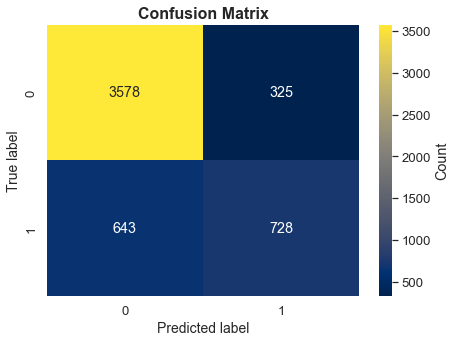

In [62]:
## Much better! using the ConfusionMatrixDisplay tool

cm = metrics.confusion_matrix(y_train, X_train_f['y_pred'])
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16,fontweight="bold")

plt.show()

### Model Improvement FM
for multi collinearity : Use Step wise , VIF
We can use tweaking and change the parameters and check training model results to evaluate.

apply model to testing data after FM changes
X_test_f, y_test

### Model 2 (using StepWise)


In [63]:
# create the function for the stepwise selection
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant), the lower the better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text

        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [64]:
# printing columns to list
print(X_train_f.columns.tolist())


['const', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Paperless Billing', 'churn_category', 'Pay_Credit card (automatic)', 'Pay_Electronic check', 'Pay_Mailed check', 'ML_Yes', 'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'Con_One year', 'Con_Two year', 'prob_no_Churn', 'prob_Churn', 'y_pred']


In [65]:
# printing the result of the stepwise selection
result = stepwise_selection(X_train_f[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
                                       'Paperless Billing', 'churn_category', 'Pay_Credit card (automatic)', 
                                       'Pay_Electronic check', 'Pay_Mailed check'
                                       , 'ML_Yes', 'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes',
                                       'Con_One year', 'Con_Two year',]], y_train)

print('resulting features:')
print(result)

Add  Tenure Months                  with p-value 1.10369e-154
Add  churn_category                 with p-value 5.7642e-104
Add  Pay_Electronic check           with p-value 1.94875e-64
Add  Dependents                     with p-value 2.58649e-41
Add  Paperless Billing              with p-value 2.77449e-25
Add  ML_Yes                         with p-value 4.42071e-17
Add  Con_One year                   with p-value 9.37251e-12
Add  Con_Two year                   with p-value 2.35654e-14
Add  Senior Citizen                 with p-value 0.000142407
Add  OS_Yes                         with p-value 0.000368218
Add  Pay_Mailed check               with p-value 0.00213874
resulting features:
['Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 'Paperless Billing', 'ML_Yes', 'Con_One year', 'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']


In [114]:
p_values = [1.10369e-154, 5.7642e-104, 1.94875e-64, 2.58649e-41, 2.77449e-25, 4.42071e-17, 9.37251e-12, 2.35654e-14, 0.000142407, 0.000368218, 0.00213874]

p_values_decimal = [format(p, '.6f') for p in p_values]
print(p_values_decimal)

['0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000142', '0.000368', '0.002139']


In [66]:
# print the X_train feature head
X_train_f.head()

,const,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,churn_category,Pay_Credit card (automatic),Pay_Electronic check,...,ML_Yes,OS_Yes,OB_Yes,DP_Yes,TS_Yes,Con_One year,Con_Two year,prob_no_Churn,prob_Churn,y_pred
5522,1.0,1,0,1,1,20,0,0,0,0,...,0,0,0,0,0,0,1,0.991050,0.008950,0
3282,1.0,0,0,0,0,65,1,1,0,1,...,1,0,1,1,0,1,0,0.535140,0.464860,0
1432,1.0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0.330539,0.669461,1
6016,1.0,1,0,1,1,64,0,0,1,0,...,1,0,0,1,0,1,0,0.987754,0.012246,0
330,1.0,0,0,0,0,2,1,1,0,1,...,0,0,0,0,1,0,0,0.157547,0.842453,1


In [67]:
# define the feature cloumns that were selected using stepwise
feature_cols_2 = ['Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 'Paperless Billing', 'ML_Yes', 'Con_One year', 'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']


In [68]:
# define the x_train_2 and y_train_2 and add constant
x_train_2 = X_train_f[feature_cols_2]
y_train_2 = y_train
x_train_2 = sm.add_constant(x_train_2, has_constant= 'skip')

In [69]:
x_train_2

,const,Tenure Months,churn_category,Pay_Electronic check,Dependents,Paperless Billing,ML_Yes,Con_One year,Con_Two year,Senior Citizen,OS_Yes,Pay_Mailed check
5522,1.0,20,0,0,1,0,0,0,1,0,0,1
3282,1.0,65,1,1,0,1,1,1,0,0,0,0
1432,1.0,1,0,1,0,1,0,0,0,1,0,0
6016,1.0,64,0,0,1,0,1,1,0,0,0,0
330,1.0,2,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6694,1.0,70,0,0,1,1,1,0,1,0,1,0
968,1.0,24,0,0,0,1,0,0,0,0,0,0
4397,1.0,28,0,0,1,1,0,1,0,0,0,0
4769,1.0,2,0,0,0,0,0,0,0,0,1,1


In [70]:
# define the model
log_reg_2 = sm.Logit(y_train_2 ,x_train_2).fit()

Optimization terminated successfully.
         Current function value: 0.390339
         Iterations 8


In [71]:
log_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5262
Method:                           MLE   Df Model:                           11
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3188
Time:                        00:00:45   Log-Likelihood:                -2058.6
converged:                       True   LL-Null:                       -3022.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7875      0.109     -7.219      0.000      -1.001      -0.574
Tenure Months           -0.0288      0.003    -11.077      0.000      -0.034      -0.024
churn_category           1.6286      0.100     16.361      0.000       1.434       1.824
Pay_Electronic check     0.5393      0.092      5.868      0.000       0.359       0.719
Dependents              -1.4384      0.130    -11.091      0.000      -1.693      -1.184
Paperless Billing        0.5954      0.086      6.886      0.000       0.426       0.765
ML_Yes                   0.6184      0.089      6.970      0.000       0.445       0.792
Con_One year            -0.9394      0.126     -7.467      0.000      -1.186      -0.693
Con_Two year            -1.7922      0.205     -8.763      0.000      -2.193      -1.391
Senior Citizen           0.2778      0.101      2.747      0.006       0.080       0.476
OS_Yes                  -0.3194      0.100     -3.195      0.001      -0.515      -0.123
Pay_Mailed check        -0.2558      0.115     -2.223      0.026      -0.481      -0.030
========================================================================================
"""

In [72]:
# define the model using data from stepwise
lr_2 = LogisticRegression(max_iter=300, random_state=10)


In [73]:
# fit the model
lr_2.fit(x_train_2, y_train_2)


LogisticRegression(max_iter=300, random_state=10)

In [74]:
# predict the probability
lr_2.predict_proba(x_train_2)


array([[0.99151336, 0.00848664],
       [0.55834751, 0.44165249],
       [0.35390011, 0.64609989],
       ...,
       [0.96566577, 0.03433423],
       [0.80466196, 0.19533804],
       [0.94558567, 0.05441433]])

In [75]:
# add the prob no churn and prob churn
x_train_2[['prob_no_Churn', 'prob_Churn']] = lr_2.predict_proba(x_train_2)


In [76]:
# decide the cutoff point
cut_off = 0.50
x_train_2['y_pred_2'] = np.where(x_train_2['prob_Churn']>= cut_off, 1, 0)

In [77]:
# print the results
get_results(y_train_2, x_train_2['y_pred_2'])


The confusion matrix for the Churning predictions is:
[[3573  654]
 [ 330  717]] 

The accuracy of the Churning prediction model is: 0.8134243458475541
The recall of the Churning prediction model is: 0.6848137535816619
The precision of the Churning prediction model is: 0.5229759299781181
The F1-score of the Churning prediction model is: 0.5930521091811415


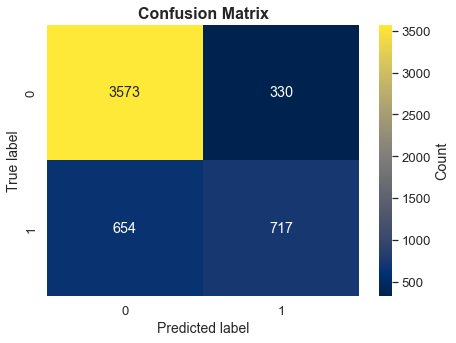

In [78]:
# display the confusion matrix
cm = metrics.confusion_matrix(y_train_2,x_train_2['y_pred_2'])
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16,fontweight="bold")

plt.show()

### Model 3 (using VIF - Variance Inflation Factor)


In [79]:

## If any of them have a higher VIF than 5, it drops the max.
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the variance inflation factor (VIF)
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))  # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]  # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True  # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables])  # finally, we print the variables that are still in our set
    return X.iloc[:, variables]  # and return our X cut down to the remaining variables

In [80]:
X_train_3 = calculate_vif(X_train_f[['Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 
                                     'Paperless Billing', 'ML_Yes', 'Con_One year',
                                     'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']])

dropping 'Tenure Months' at index: 0
Remaining variables:
Index(['churn_category', 'Pay_Electronic check', 'Dependents',
       'Paperless Billing', 'ML_Yes', 'Con_One year', 'Con_Two year',
       'Senior Citizen', 'OS_Yes', 'Pay_Mailed check'],
      dtype='object')


In [81]:
# define the feature columns
feature_cols_3 = ['churn_category', 'Pay_Electronic check', 'Dependents', 
                                     'Paperless Billing', 'ML_Yes', 'Con_One year',
                                     'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']

In [82]:
# define the x_train_3 and y_train_3 and add constant
x_train_3 = X_train_f[feature_cols_3]
y_train_3 = y_train
x_train_3 = sm.add_constant(x_train_3, has_constant= 'skip')

In [83]:
# define the model
log_reg_3 = sm.Logit(y_train_3 ,x_train_3).fit()

Optimization terminated successfully.
         Current function value: 0.402666
         Iterations 8


In [84]:
log_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5263
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2973
Time:                        00:00:46   Log-Likelihood:                -2123.7
converged:                       True   LL-Null:                       -3022.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1585      0.104    -11.157      0.000      -1.362      -0.955
churn_category           1.6152      0.097     16.623      0.000       1.425       1.806
Pay_Electronic check     0.6627      0.089      7.417      0.000       0.488       0.838
Dependents              -1.4999      0.129    -11.647      0.000      -1.752      -1.248
Paperless Billing        0.5094      0.085      6.003      0.000       0.343       0.676
ML_Yes                   0.2798      0.081      3.449      0.001       0.121       0.439
Con_One year            -1.5583      0.114    -13.667      0.000      -1.782      -1.335
Con_Two year            -2.7337      0.187    -14.590      0.000      -3.101      -2.367
Senior Citizen           0.1502      0.098      1.540      0.124      -0.041       0.341
OS_Yes                  -0.5029      0.097     -5.180      0.000      -0.693      -0.313
Pay_Mailed check         0.0304      0.111      0.273      0.785      -0.188       0.249
========================================================================================
"""

In [85]:
# define the model
lr_3 = LogisticRegression(max_iter=300, random_state=10)


In [86]:
# fit the model
lr_3.fit(x_train_3, y_train_3)


LogisticRegression(max_iter=300, random_state=10)

In [87]:
# predict the probability
lr_3.predict_proba(x_train_3)


array([[0.99476998, 0.00523002],
       [0.41397181, 0.58602819],
       [0.45900054, 0.54099946],
       ...,
       [0.97493364, 0.02506636],
       [0.83710695, 0.16289305],
       [0.93834121, 0.06165879]])

In [88]:
# add prob no churn and prob churn
x_train_3[['prob_no_Churn', 'prob_Churn']] = lr_3.predict_proba(x_train_3)


In [89]:
# decide the cutoff point
cut_off = 0.50
x_train_3['y_pred_3'] = np.where(x_train_3['prob_Churn']>= cut_off, 1, 0)

In [90]:
# print the results
get_results(y_train_3, x_train_3['y_pred_3'])


The confusion matrix for the Churning predictions is:
[[3513  647]
 [ 390  724]] 

The accuracy of the Churning prediction model is: 0.8033750474023511
The recall of the Churning prediction model is: 0.6499102333931778
The precision of the Churning prediction model is: 0.5280816921954777
The F1-score of the Churning prediction model is: 0.5826961770623743


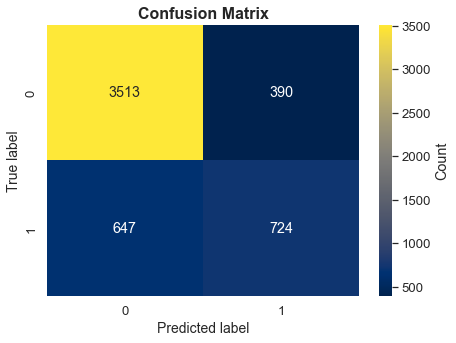

In [91]:
# display the confusion matrix

cm = metrics.confusion_matrix(y_train_3,x_train_3['y_pred_3'])
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16,fontweight="bold")

plt.show()

# Testing Data with the best performing model for training

In [92]:
#The basemodel works the best after comparing all the 3 model results
# So we go with choosing the basemodel parameters
# Apply the same predictive model to testing data

In [93]:
# Apply feature engineering to test data only once
X_test_f = feature_engineering(X_test)

In [94]:
# add constant
X_test_f = sm.add_constant(X_test_f, has_constant='skip')

In [95]:
# X_test_f columns
X_test_f.columns

Index(['const', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'churn_category',
       'Pay_Credit card (automatic)', 'Pay_Electronic check',
       'Pay_Mailed check', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'IS_No', 'OS_No internet service', 'OS_Yes', 'OB_No internet service',
       'OB_Yes', 'DP_No internet service', 'DP_Yes', 'TS_No internet service',
       'TS_Yes', 'ST_No internet service', 'ST_Yes', 'SM_No internet service',
       'SM_Yes', 'Con_One year', 'Con_Two year'],
      dtype='object')

In [96]:
## Let's store them in 2 columns then, called 'prob_no_Churn' and 'prob_Churn'
X_test_f[['prob_no_Churn', 'prob_Churn']] = lr_2.predict_proba(X_test_f[['const','Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 
'Paperless Billing', 'ML_Yes', 'Con_One year', 
'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']])

In [97]:
#Will this customer get churn?
## This will be based on the probabilities offered. If prob_churn > .5, we can say they will churn.
## Why .5? This is what we call a CUT-OFF POINT - and it's yet another parameter we can pick! We'll try .5, but it might indeed
## not be the optimum value. Maybe we need to use .6, maybe .65: You should explore this on your own
## We'll store our prediction in a column called 'y_pred' and use the np.where() method to do so

cut_off = 0.50
X_test_f['y_pred'] = np.where(X_test_f['prob_Churn']>= cut_off, 1, 0)

In [98]:
## We'll use our trusty confusion matrix to answer the question above. 
print(metrics.confusion_matrix(X_test_f['y_pred'], y_test))

[[1137  220]
 [ 123  278]]


In [99]:
## Now, we simply apply the function on our predictions
get_results(y_test, X_test_f['y_pred'])

The confusion matrix for the Churning predictions is:
[[1137  220]
 [ 123  278]] 

The accuracy of the Churning prediction model is: 0.8048919226393629
The recall of the Churning prediction model is: 0.6932668329177057
The precision of the Churning prediction model is: 0.5582329317269076
The F1-score of the Churning prediction model is: 0.6184649610678532


In [100]:
## The classification report provides details! 
print(metrics.classification_report(y_test, X_test_f['y_pred']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1260
           1       0.69      0.56      0.62       498

    accuracy                           0.80      1758
   macro avg       0.77      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



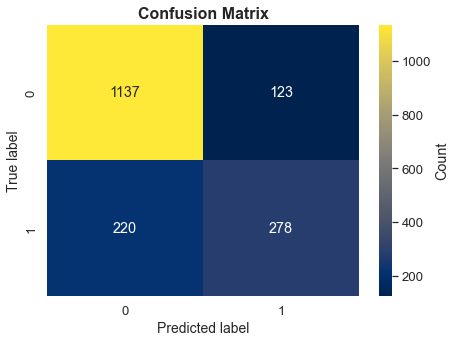

In [101]:
# display the confusin matrix
cm = metrics.confusion_matrix(y_test, X_test_f['y_pred'])
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16,fontweight="bold")

plt.show()

#### Finding the top 500 churners using the predictive model, who have not churned yet

In [102]:
## Once you have made a predictive model, you are able to apply it to new data. So we would take the data, untouched from the beginning, with everyone who has not yet churned. We'd then run the predictive model on that to find out their likelihood of churn - and the top 500 are your list

In [103]:
# the customers who have not yet churned
df_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


In [104]:
# drop the columns
df_churn.drop(columns = ['Count', 'Country', 'State', 'Churn Label','Total Charges','Latitude','Longitude', 'Zip Code','Lat Long','Churn Reason' ], inplace = True)


In [105]:
# Calculate the Churn rate and apply
df_churn_counts = df_churn.groupby("City")["Churn Value"].sum()
df_customer_counts = df_churn.groupby("City")["CustomerID"].nunique()

churn_rate = df_churn_counts / df_customer_counts


def categorise_city(churn_rate):
    if churn_rate >= 0.5:
        return "High Churning City"
    else:
        return "Low Churning City"


df_churn["churn_category"] = df_churn["City"].map(churn_rate.apply(categorise_city))
# Drop the "City" column
df_churn.drop("City", axis=1, inplace=True)

In [106]:
# display the data frame
df_churn.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,churn_category
1869,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,Low Churning City
1870,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,0,Low Churning City
1871,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,Low Churning City
1872,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,0,Low Churning City
1873,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,0,Low Churning City


In [107]:
#apply feature engineering to this dataset
df_churn_f = feature_engineering(df_churn)

In [108]:
# prin the head
df_churn_f.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Value,...,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,ST_No internet service,ST_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year
1869,7590-VHVEG,0,0,1,0,1,0,1,29.85,0,...,0,0,0,0,0,0,0,0,0,0
1870,5575-GNVDE,1,0,0,0,34,1,0,56.95,0,...,0,1,0,0,0,0,0,0,1,0
1871,7795-CFOCW,1,0,0,0,45,0,0,42.30,0,...,0,1,0,1,0,0,0,0,1,0
1872,1452-KIOVK,1,0,0,1,22,1,1,89.10,0,...,0,0,0,0,0,1,0,0,0,0
1873,6713-OKOMC,0,0,0,0,10,0,0,29.75,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Send the mailers to the top 500 customers after identifying them, who have not yet churned and might churn in future
import warnings
warnings.filterwarnings("ignore")

df_churn_f =  sm.add_constant(df_churn_f, has_constant='skip')
df_churn_f = df_churn_f.set_index('CustomerID')

# Predict the probability of churn for each customer
churn_probs = lr_2.predict_proba(df_churn_f[['const','Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 
'Paperless Billing', 'ML_Yes', 'Con_One year', 
'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']])[:, 1]

# Combine the customer ID and churn probability into a DataFrame
customer_churn_probs = pd.DataFrame({'CustomerID': df_churn_f.index, 'churn_prob': churn_probs})

# Sort the customers in decreasing order of churn probability and select the top 500
top_customers = customer_churn_probs.sort_values(by='churn_prob', ascending=False).head(500)
top_customers


,CustomerID,churn_prob
256,0021-IKXGC,0.771480
2472,2545-EBUPK,0.766295
2329,5150-ITWWB,0.761029
698,6630-UJZMY,0.755682
1813,1197-BVMVG,0.755682
...,...,...
2013,4236-UJPWO,0.425210
4408,2080-GKCWQ,0.425210
1596,3995-WFCSM,0.425210
2639,1730-ZMAME,0.424923


In [110]:
#sending the customer list to a .csv file
top_customers.to_csv('top_customers.csv')


In [111]:
# to find the risk of the remaining customers who have not yet churned and might churn in the future
# Predict the probability of churn for each customer, who is from the remaining list
churn_probs_remaining = lr_2.predict_proba(df_churn_f[['const','Tenure Months', 'churn_category', 'Pay_Electronic check', 'Dependents', 
'Paperless Billing', 'ML_Yes', 'Con_One year', 
'Con_Two year', 'Senior Citizen', 'OS_Yes', 'Pay_Mailed check']])[:, 1]

# Combine the customer ID and churn probability into a DataFrame
customer_churn_probs_remaining = pd.DataFrame({'CustomerID': df_churn_f.index, 'churn_prob': churn_probs_remaining})

# Sort the customers in decreasing order of churn probability and select the top 500
remaining_customers = customer_churn_probs.sort_values(by='churn_prob', ascending=False)
# Select all customers beyond the top 500
remaining_customers = remaining_customers.iloc[500:]
remaining_customers

,CustomerID,churn_prob
2899,5712-VBOXD,0.424420
1027,8714-CTZJW,0.424420
2118,1564-HJUVY,0.424420
5020,7976-CICYS,0.424420
1647,3420-ZDBMA,0.422436
...,...,...
3847,3511-BFTJW,0.001772
4409,2193-SFWQW,0.001772
3768,7113-HIPFI,0.001627
4221,8882-TLVRW,0.001491


In [112]:
#to create another list of the remaining customers and convert to another .csv file
remaining_customers.to_csv('remaining_customers.csv')